## MOVIES RECOMENDATION SYSTEM PROJECT
#### GROUP 3
##### Group Members:
      Gideon Ochieng
      Lorna Wangui
      Ann Mwangi
      Charles Odhiambo
      Victor Masinde


### Project Overview
An international powerhouse, the film business brings in billions of dollars every year. According to Statista, the worldwide box office brought in an incredible $42.5 billion in 2019 alone. Film production, which include studios, independent producers, and streaming services, is the creative centre where motion pictures, television series, and other visual content are made. These works are marketed and delivered to theatres, streaming platforms, and other locations by the distribution division. The term "exhibition" describes the showing of films and television series in theatres. The allure of films is universal, bringing people from different origins together. Despite this widespread appeal, our individual film preferences are distinctive, ranging from romance to sci-fi to thrillers, and frequently focussing on our favourite actors and filmmakers.

### Business Understanding
#### Real-World Problem
In an era where streaming platforms dominate the entertainment landscape, users often face difficulty in selecting movies due to the overwhelming number of choices available. This leads to "choice paralysis," where the sheer volume of options prevents users from making satisfying decisions. A recommendation system can address this by providing personalized movie suggestions based on a user’s past ratings, making their movie-watching experience more enjoyable and efficient.

#### Stakeholders
Primary Stakeholders:

End Users: Individuals who need personalized recommendations to find movies they are likely to enjoy.
Streaming Platforms: Businesses looking to enhance user engagement and retention by offering tailored recommendations.
Secondary Stakeholders:

Movie Studios: Studios seeking insights into audience preferences to guide future productions.
Market Researchers: Analysts studying consumer behavior through movie preferences and trends.
Project Value
The project will solve the problem of overwhelming choice by providing users with a personalized top-5 list of movie recommendations. It will:

Enhance user satisfaction by reducing time spent searching for movies.
Improve user engagement for streaming platforms, leading to higher retention rates.
Help streaming platforms and studios understand user preferences, informing content strategies and acquisitions.
Business Goals
Create a recommendation system using collaborative filtering to predict user preferences.
Provide an easy-to-use interface where users can input ratings for movies they've watched.
Ensure the system addresses the "cold start" problem for new users by incorporating content-based techniques.

Conclusion

The recommendation system will make movie selection faster and more satisfying for users, while also providing business value to streaming platforms and studios by increasing engagement and understanding consumer preferences.

### Data Understanding

The project uses the **MovieLens dataset**, a widely used dataset from the **GroupLens research lab** at the University of Minnesota.

In [27]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
movies_df = pd.read_csv('ml-latest-small/movies.csv')
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
link_df = pd.read_csv('ml-latest-small/links.csv')
tags_df = pd.read_csv('ml-latest-small/tags.csv')


#### Movies dataset

In [29]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [30]:
movies_df.shape

(9742, 3)

### 

#### Ratings Dataset

In [31]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [32]:
ratings_df.shape

(100836, 4)

#### Tags Dataset

In [33]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [34]:
tags_df.shape

(3683, 4)

#### Links Dataset

In [35]:
link_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [36]:
link_df.shape

(9742, 3)

## DATA CLEANING

In [37]:
# Merge the movies_df with ratings_df on movieId
df=pd.merge(movies_df,ratings_df,on="movieId",how="inner")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [38]:
# Basic information about the merged dataframes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


In [39]:
# Size of merged dataframe
df.shape

(100836, 6)

In [40]:
# checking the columns in the merged dataframe
df.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [41]:
# Merged dataset description
df.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [42]:
# checking for duplicates in the dataframe
df.duplicated().sum()

0

In [43]:
# checking for missing values
df.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [44]:
duplicated_rows = df[df.duplicated(subset=['userId','movieId'])]
duplicated_rows

,movieId,title,genres,userId,rating,timestamp


### EDA

In [45]:
# popular movies
popular_movies = df['title'].value_counts()
popular_movies

Forrest Gump (1994)                                  329
Shawshank Redemption, The (1994)                     317
Pulp Fiction (1994)                                  307
Silence of the Lambs, The (1991)                     279
Matrix, The (1999)                                   278
                                                    ... 
Cold in July (2014)                                    1
Ballad of Narayama, The (Narayama bushiko) (1983)      1
Comme un chef (2012)                                   1
Mozart and the Whale (2005)                            1
Dobermann (1997)                                       1
Name: title, Length: 9719, dtype: int64

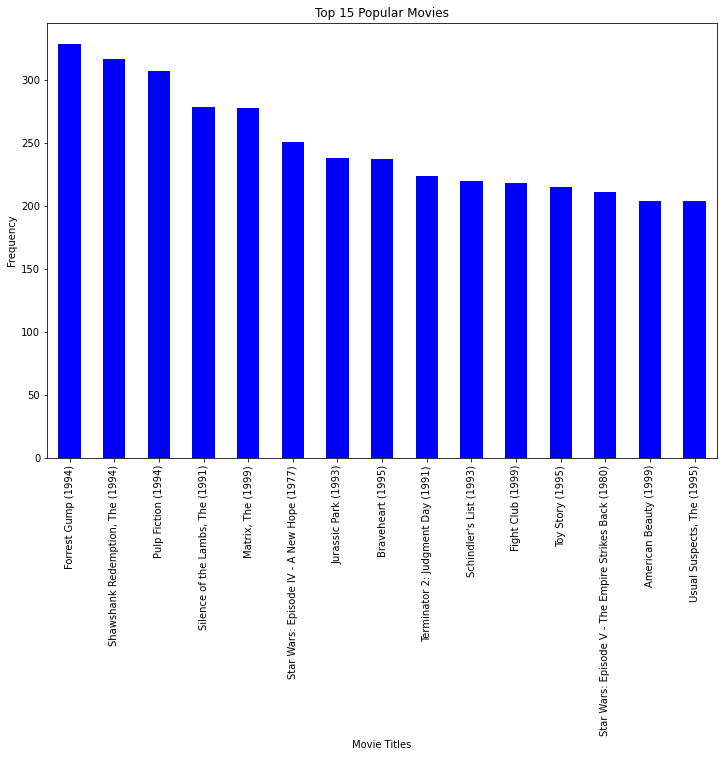

In [46]:
#plot for  most popular movies
plt.figure(figsize=(12,8))
df['title'].value_counts().head(15).plot(kind='bar',color ='blue')
plt.title('Top 15 Popular Movies')
plt.xlabel('Movie Titles')
plt.ylabel('Frequency')
plt.show()


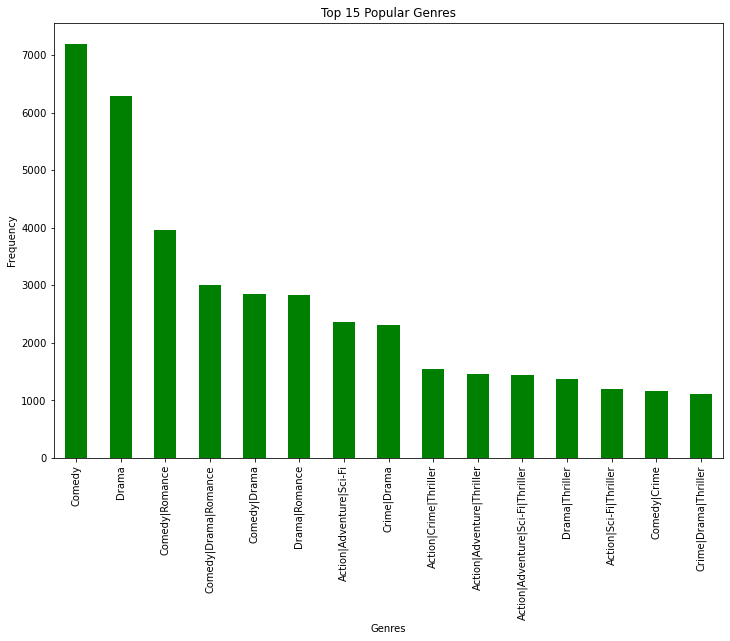

In [47]:
# plot for popular genres
plt.figure(figsize=(12,8))
df['genres'].value_counts().head(15).plot(kind='bar',color='green')
plt.title('Top 15 Popular Genres')
plt.ylabel('Frequency')
plt.xlabel('Genres')
plt.show()

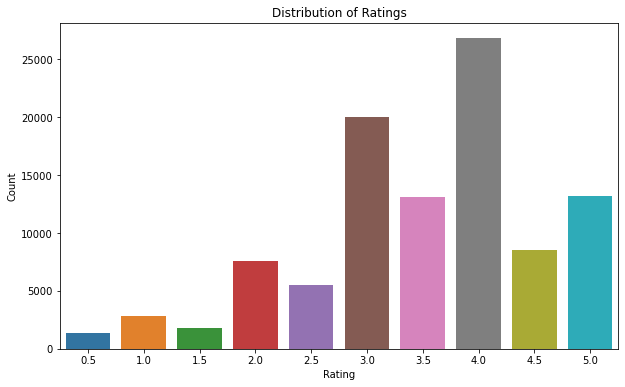

In [48]:
# plot for the distribution of ratings
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# Observed ratings per genre


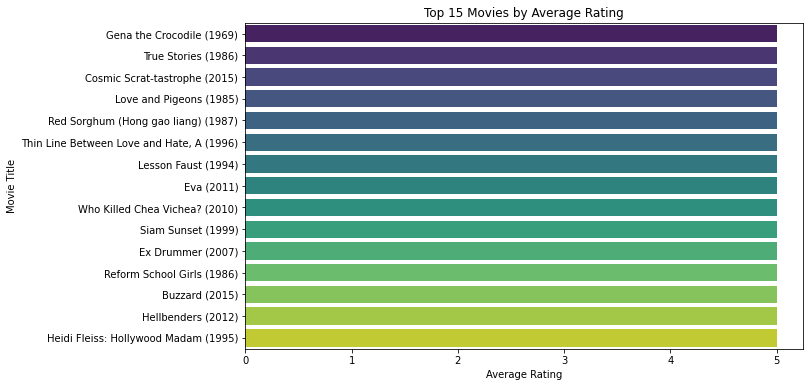

In [51]:
#HIGHEST RATED MOVIES
# the average rating for each movie
average_ratings = df.groupby('title')['rating'].mean().reset_index()

# Rename the columns
average_ratings.columns = ['title', 'avg_rating']

# Sort the movies by average rating in descending order
average_ratings = average_ratings.sort_values(by='avg_rating', ascending=False)

# bar plot to visualize the top 10 movies by average rating
plt.figure(figsize=(10, 6))
sns.barplot(x="avg_rating", y="title", data=round(average_ratings.head(15), 2), palette="viridis")
plt.title("Top 15 Movies by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()